In [1]:
from Bio import Entrez
from Bio import SeqIO

# Read the email from a file to keep it secure
try:
    with open("email.txt", "r") as f:
        email = f.read().strip()
        if not email:
            print("Warning: email.txt is empty. Please add your email address.")
            Entrez.email = "placeholder@example.com" # Using a placeholder for now
        else:
            Entrez.email = email
except FileNotFoundError:
    print("Error: email.txt file not found. Please create it and add your email.")
    Entrez.email = "placeholder@example.com" # Using a placeholder for now


# Accession numbers for the DNA sequences we want to download
accession_numbers = {
    "thermus_thermophilus": "AY053597.1",
    "tardigrade_dujardini": "AY878593.1"
}

# Loop through each accession number
for name, acc_num in accession_numbers.items():
    try:
        handle = Entrez.efetch(db="nucleotide", id=acc_num, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()

        file_name = f"{name}.fasta"
        with open(file_name, "w") as f:
            f.write(record.format("fasta"))
        
        print(f"Successfully created {file_name}.")
    
    except Exception as e:
        print(f"An error occurred: Could not fetch data for {acc_num}. Error: {e}")

Successfully created thermus_thermophilus.fasta.
Successfully created tardigrade_dujardini.fasta.


In [2]:
### from Bio import SeqIO

# Read the thermus_thermophilus.fasta file
# We are creating a SeqRecord object from the file.
print("Reading thermus_thermophilus.fasta...")
thermus_record = SeqIO.read("thermus_thermophilus.fasta", "fasta")

# Read the tardigrade_dujardini.fasta file
print("Reading tardigrade_dujardini.fasta...")
tardigrade_record = SeqIO.read("tardigrade_dujardini.fasta", "fasta")

# Let's print some basic information about the sequences
print("\n--- Basic Information ---")
print("Thermus thermophilus:")
print(f"ID: {thermus_record.id}")
print(f"Name: {thermus_record.name}")
print(f"Description: {thermus_record.description}")
print(f"Length: {len(thermus_record.seq)} base pairs")

print("\ntardigrade_dujardini:")
print(f"ID: {tardigrade_record.id}")
print(f"Name: {tardigrade_record.name}")
print(f"Description: {tardigrade_record.description}")
print(f"Length: {len(tardigrade_record.seq)} base pairs")

# Now let's print a small part of the DNA sequence itself
print("\n--- First 50 base pairs of the sequences ---")
print(f"Thermus thermophilus: {thermus_record.seq[:50]}...")
print(f"tardigrade_dujardini: {tardigrade_record.seq[:50]}...")

Reading thermus_thermophilus.fasta...
Reading tardigrade_dujardini.fasta...

--- Basic Information ---
Thermus thermophilus:
ID: AY053597.1
Name: AY053597.1
Description: AY053597.1 Neotoma fuscipes isolate MVZ196532 mitochondrial tRNA-Pro gene and D-loop, partial sequence
Length: 535 base pairs

tardigrade_dujardini:
ID: AY878593.1
Name: AY878593.1
Description: AY878593.1 Plasmodium falciparum isolate G5 thrombospondin-related adhesive protein gene, partial cds
Length: 1635 base pairs

--- First 50 base pairs of the sequences ---
Thermus thermophilus: CATTCTCAATAAACTACTTCCTGTACATAAAATTACATAGTACATTAATA...
tardigrade_dujardini: ATGAATCATCTTGGGAATGTTAAATATTTAGTCATTGTGTTTTTGATTTT...


In [3]:
from Bio.Seq import Seq

# Define a function to calculate GC content
def calculate_gc(sequence):
    """
    Calculates the GC content of a DNA sequence.
    """
    gc_count = sequence.count("G") + sequence.count("C")
    total_length = len(sequence)
    if total_length == 0:
        return 0
    return (gc_count / total_length) * 100

# Get the sequences from the SeqRecord objects
thermus_seq = thermus_record.seq
tardigrade_seq = tardigrade_record.seq

# Calculate the GC content for each sequence using our function
thermus_gc = calculate_gc(thermus_seq)
tardigrade_gc = calculate_gc(tardigrade_seq)

# Print the results
print("--- GC Content Analysis ---")
print(f"GC content of Thermus thermophilus: {thermus_gc:.2f}%")
print(f"GC content of Tardigrade: {tardigrade_gc:.2f}%")

--- GC Content Analysis ---
GC content of Thermus thermophilus: 35.14%
GC content of Tardigrade: 33.21%


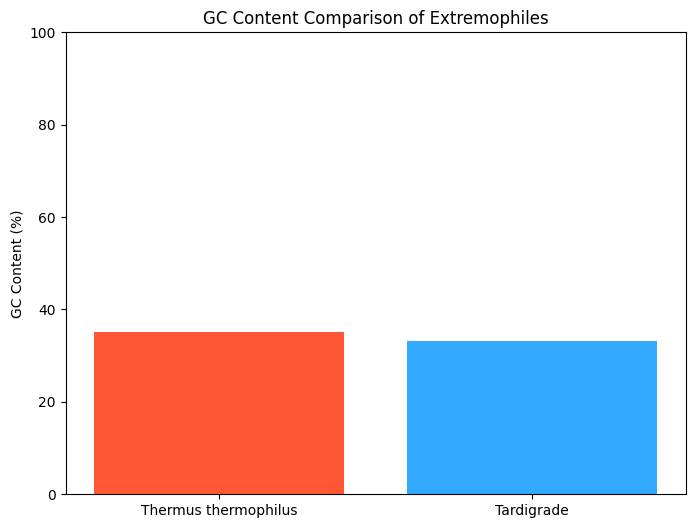

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
organisms = ['Thermus thermophilus', 'Tardigrade']
gc_content_values = [35.14, 33.21] # Use the values you obtained

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(organisms, gc_content_values, color=['#ff5733', '#33aaff'])

# Add labels and title
plt.ylabel('GC Content (%)')
plt.title('GC Content Comparison of Extremophiles')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100

# Display the chart
plt.show()

In [5]:
from Bio import Align

# Get the sequences from the SeqRecord objects
thermus_seq = thermus_record.seq
tardigrade_seq = tardigrade_record.seq

# Create a new aligner object. We'll set the scoring.
# 'match_score=1' means matching bases get 1 point.
# 'mismatch_score=0' means non-matching bases get 0 points.
aligner = Align.PairwiseAligner()
aligner.match_score = 1.0
aligner.mismatch_score = 0.0

# Align the two sequences and get the alignment score
score = aligner.score(thermus_seq, tardigrade_seq)

print("--- DNA Sequence Alignment Score ---")
print(f"Alignment Score: {score}")

# Let's also print the alignment to see what it looks like
print("\n--- Alignment Details (First 1) ---")
for alignment in aligner.align(thermus_seq, tardigrade_seq):
    print(alignment)
    break  # We only need to show the first alignment

--- DNA Sequence Alignment Score ---
Alignment Score: 510.0

--- Alignment Details (First 1) ---
target            0 CAT---TC-TC-----AAT---AAACTACTT----CC-T-GT-------A----C----A
                  0 -||---||-||-----|||---|||-||-||----|--|-||-------|----|----|
query             0 -ATGAATCATCTTGGGAATGTTAAA-TA-TTTAGTC-ATTGTGTTTTTGATTTTCTTTGA

target           27 T--------A---AA----A----T-T--A---CA-TA--GT--AC--A--TTAA--TA-
                 60 |--------|---||----|----|-|--|---||-||--||--|---|--|-||--||-
query            56 TTTGTTTCTAGTTAATGGTAGAGATGTGCAAAACAATATAGTGGA-TGAAAT-AAAATAT

target           50 C---A-----T-T--AATG-T-A--TA--TCGT--AC-----A-T---T--------AA-
                120 |---|-----|-|--||||-|-|--||--||-|--||-----|-|---|--------||-
query           114 CGTGAAGAAGTATGTAATGATGAGGTAGATC-TTTACCTTCTAATGGATTGTTCTGGAAG

target           73 T-T---T----AT--TT-----A-CCA--CA-T---TC-A--TAT-AA---G---CAAGT
                180 |-|---|----||--||-----|-|||--||-|---||-|--|||-||---|---|||--
query    